### Import Library

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

### Import Dataset


In [62]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Drop feature that no correlation

In [64]:
df_dropped = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_dropped.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Check missing values


In [65]:
df_dropped.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Impute Age column with Median

In [66]:
df_dropped['Age'].fillna(df_dropped['Age'].median(), inplace=True)

C:\Users\revel\AppData\Local\Temp\ipykernel_24308\326364057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['Age'].fillna(df_dropped['Age'].median(), inplace=True)


### Before Scaling, separate the column Survived as target 

In [67]:
y = df_dropped['Survived']

### Separate the Numerical and Categorical Column

In [68]:
num_col = df_dropped.select_dtypes(exclude='object').columns.tolist()
num_col.remove('Survived')
cat_col = df_dropped.select_dtypes(include='object').columns.tolist()

### Using Standard Scaling for Numerical Feature


In [69]:

scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_dropped[num_col]), columns=num_col)

### Encoding the categorical columns



In [70]:
df_cat_encoded = df_dropped[cat_col].copy()

le = LabelEncoder()
for col in cat_col:
    df_cat_encoded[col] = le.fit_transform(df_cat_encoded[col])

### Combine categorical and numerical columns as Selected Features 

In [71]:
X = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

## 1. Split the dataset into a training set and a testing set to evaluate your model's performance (70:30)

### Train Test Split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Develop a Support Vector Machine model using your selected features.


### Training SVM Models

In [73]:
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Predict Test Dataset

In [74]:
y_pred = classifier.predict(X_test)

### Predict Test Dataset Probability (For ROC-AOC)

In [75]:
classifier = SVC(kernel='linear', probability=True, random_state=42)
classifier.fit(X_train, y_train)
y_prob = classifier.predict_proba(X_test)[:, 1]

## 3. Evaluate the performance of your model using metrics such as accuracy, precision, recall, and the ROC-AUC score

In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("SVM Classifier\n")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"ROC AUC   : {roc_auc:.2f}")


SVM Classifier

Accuracy  : 0.79
Precision : 0.77
Recall    : 0.70
ROC AUC   : 0.78


### Confusion Matrix

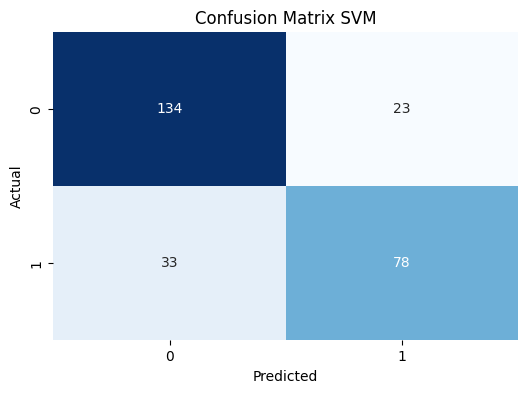

In [77]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()


### ROC Curve

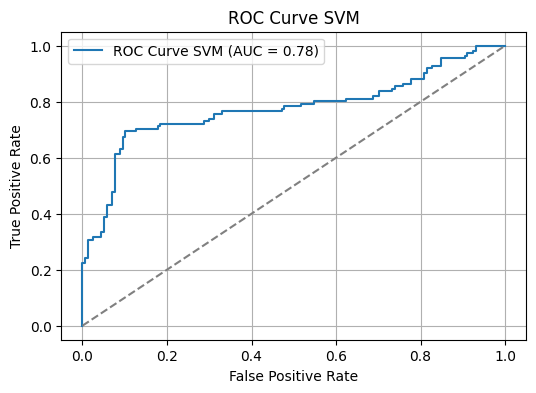

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend()
plt.grid(True)
plt.show()

## 4. Compare it with Decision Tree and Random Forest. Analyze the results

### a. Decision Tree


#### Training Model

In [79]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

#### Predict the Data test

In [80]:
y_pred_dt = dt_model.predict(X_test)

#### Predict Test Dataset Probability (For ROC-AOC)

In [81]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

#### Performance

In [82]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print("Decision Tree Classifier\n")
print(f"Accuracy  : {accuracy_dt:.2f}")
print(f"Precision : {precision_dt:.2f}")
print(f"Recall    : {recall_dt:.2f}")
print(f"ROC AUC   : {roc_auc_dt:.2f}")


Decision Tree Classifier

Accuracy  : 0.74
Precision : 0.69
Recall    : 0.68
ROC AUC   : 0.73


#### Confusion Matrix

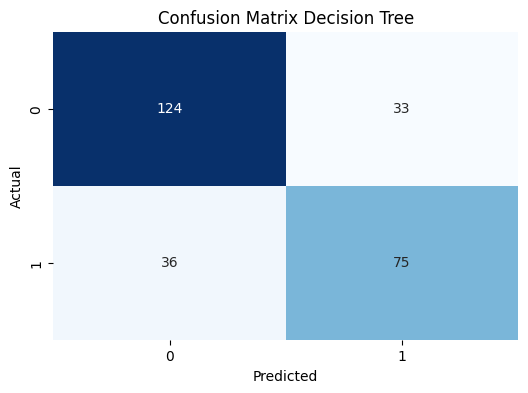

In [83]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Decision Tree")
plt.show()

#### ROC Curve

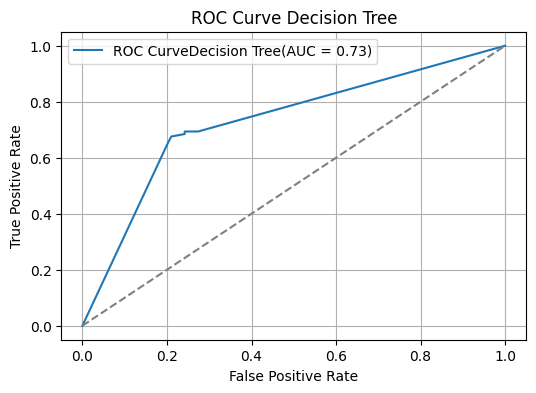

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC CurveDecision Tree(AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

### b. Random Forest

#### Training Model

In [85]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Predict the Data test

In [86]:

y_pred_rf = rf_model.predict(X_test)

#### Predict Test Dataset Probability (For ROC-AOC)

In [87]:

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#### Performance

In [88]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Classifier\n")
print(f"Accuracy  : {accuracy_rf:.2f}")
print(f"Precision : {precision_rf:.2f}")
print(f"Recall    : {recall_rf:.2f}")
print(f"ROC AUC   : {roc_auc_rf:.2f}")


Random Forest Classifier

Accuracy  : 0.78
Precision : 0.74
Recall    : 0.73
ROC AUC   : 0.86


#### Confusion Matrix

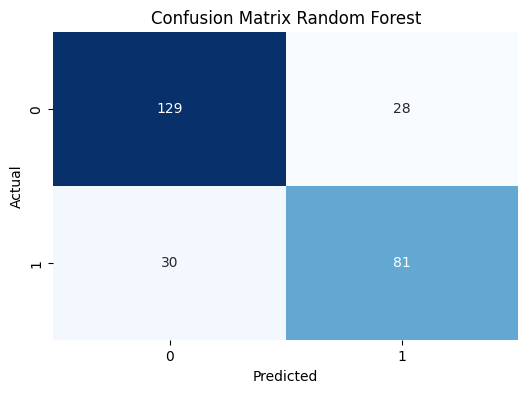

In [89]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest")
plt.show()

#### ROC Curve

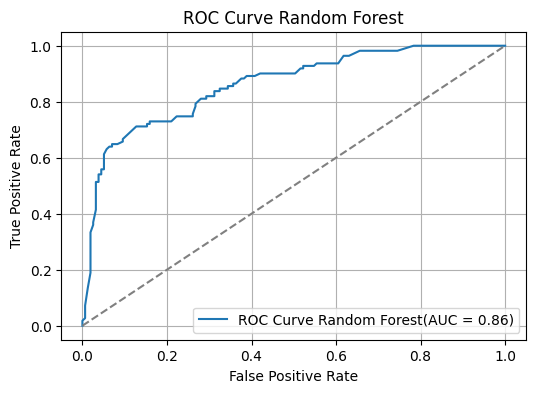

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve Random Forest(AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend()
plt.grid(True)
plt.show()